In [4]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
dataframe_sentimento = pd.read_csv("dataframe_final_candidatos_pronto_para_sentimento.csv")

In [7]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo
0,2022-07-31 15:56:44+00:00,1553771653435367424,@DeputadoFederal @LulaOficial https://t.co/WIm...,Lula,
1,2022-07-31 15:56:43+00:00,1553771651052994560,@LulaOficial Reconstruir o que? Bolsonaro já f...,Lula,reconstruir o que? bolsonaro já fez isso.
2,2022-07-31 15:56:42+00:00,1553771643922677760,@ThiagoResiste Lula Presidente 2022 !!,Lula,lula presidente 2022 !!
3,2022-07-31 15:56:41+00:00,1553771642270191618,@inst_lula Esse e Meu presidente e LULA!,Lula,esse e meu presidente e lula!
4,2022-07-31 15:56:41+00:00,1553771642094067712,@LulaOficial @ricardostuckert Kkkkkkkk. Piada ...,Lula,kkkkkkkk. piada pronta de pilantra


In [8]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [9]:
dataframe_sentimento['Sentimentos'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [10]:
dataframe_sentimento.tail()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos
148,2022-07-31 15:52:04+00:00,1553770477826592773,@carlatoscan @vivendonobrasil @parox40 @sougue...,Ciro Gomes,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
149,2022-07-31 15:52:03+00:00,1553770474718597127,@nobrelobo @TGANASTACIO @cirogomes Oq incomoda...,Ciro Gomes,"oq incomoda ele é isso, a toalha é apenas u...","{'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp..."
150,2022-07-31 15:51:56+00:00,1553770446201528320,@MarxSimpsons @cirogomes Aquele tuíte foi uma ...,Ciro Gomes,aquele tuíte foi uma resposta sua a mim quan...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp..."
151,2022-07-31 15:51:37+00:00,1553770366920704000,Hoje foi dia de levar Ciro Gomes às ruas de N....,Ciro Gomes,hoje foi dia de levar ciro gomes às ruas de n....,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
152,2022-07-31 15:51:34+00:00,1553770353649979393,@alertatotal @LulaOficial @jairbolsonaro @ciro...,Ciro Gomes,desesperoooooooooooo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [11]:
dataframe_sentimento['Sentimentos']

0      {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
149    {'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...
150    {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...
151    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimentos, Length: 153, dtype: object

In [12]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['compound'])

In [13]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao
0,2022-07-31 15:56:44+00:00,1553771653435367424,@DeputadoFederal @LulaOficial https://t.co/WIm...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0
1,2022-07-31 15:56:43+00:00,1553771651052994560,@LulaOficial Reconstruir o que? Bolsonaro já f...,Lula,reconstruir o que? bolsonaro já fez isso.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,2022-07-31 15:56:42+00:00,1553771643922677760,@ThiagoResiste Lula Presidente 2022 !!,Lula,lula presidente 2022 !!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,2022-07-31 15:56:41+00:00,1553771642270191618,@inst_lula Esse e Meu presidente e LULA!,Lula,esse e meu presidente e lula!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,2022-07-31 15:56:41+00:00,1553771642094067712,@LulaOficial @ricardostuckert Kkkkkkkk. Piada ...,Lula,kkkkkkkk. piada pronta de pilantra,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [14]:
sentimento = []

In [15]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')
  

In [16]:
sentimento

['Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Negativo',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neu

In [17]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [18]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 15:56:44+00:00,1553771653435367424,@DeputadoFederal @LulaOficial https://t.co/WIm...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro
1,2022-07-31 15:56:43+00:00,1553771651052994560,@LulaOficial Reconstruir o que? Bolsonaro já f...,Lula,reconstruir o que? bolsonaro já fez isso.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-31 15:56:42+00:00,1553771643922677760,@ThiagoResiste Lula Presidente 2022 !!,Lula,lula presidente 2022 !!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-31 15:56:41+00:00,1553771642270191618,@inst_lula Esse e Meu presidente e LULA!,Lula,esse e meu presidente e lula!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-31 15:56:41+00:00,1553771642094067712,@LulaOficial @ricardostuckert Kkkkkkkk. Piada ...,Lula,kkkkkkkk. piada pronta de pilantra,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [19]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      134
Negativo     12
Positivo      7
Name: Sentimento_Final, dtype: int64

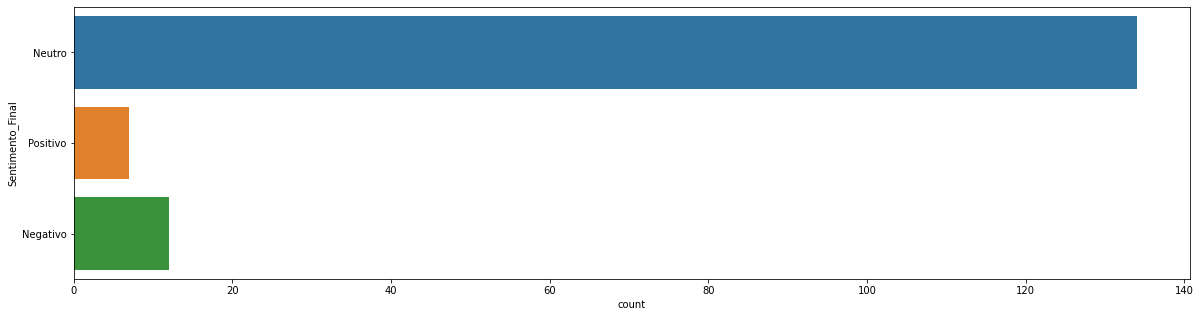

In [20]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sentimento_Final", data=dataframe_sentimento)

### Lula

In [21]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato'] == "Lula"] 

In [22]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 15:56:44+00:00,1553771653435367424,@DeputadoFederal @LulaOficial https://t.co/WIm...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro
1,2022-07-31 15:56:43+00:00,1553771651052994560,@LulaOficial Reconstruir o que? Bolsonaro já f...,Lula,reconstruir o que? bolsonaro já fez isso.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-31 15:56:42+00:00,1553771643922677760,@ThiagoResiste Lula Presidente 2022 !!,Lula,lula presidente 2022 !!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-31 15:56:41+00:00,1553771642270191618,@inst_lula Esse e Meu presidente e LULA!,Lula,esse e meu presidente e lula!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-31 15:56:41+00:00,1553771642094067712,@LulaOficial @ricardostuckert Kkkkkkkk. Piada ...,Lula,kkkkkkkk. piada pronta de pilantra,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [23]:
resultado_filtro_lula['Candidato'].unique()

array(['Lula'], dtype=object)

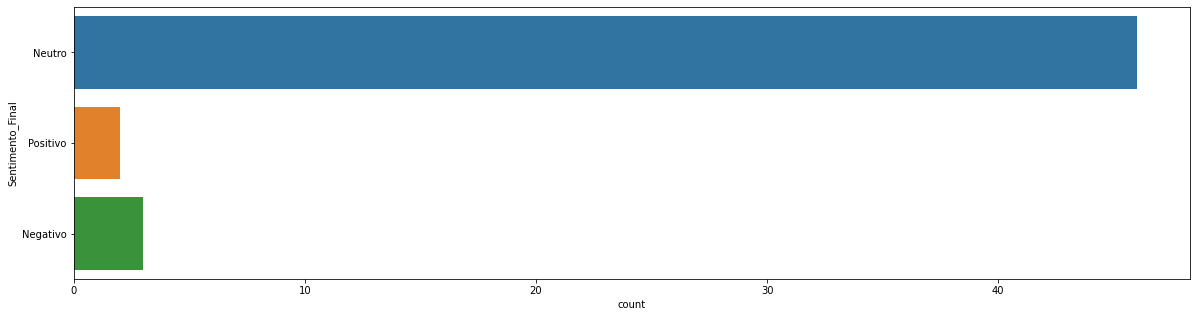

In [24]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sentimento_Final", data=resultado_filtro_lula)

In [25]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 15:56:44+00:00,1553771653435367424,@DeputadoFederal @LulaOficial https://t.co/WIm...,Lula,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,Neutro
1,2022-07-31 15:56:43+00:00,1553771651052994560,@LulaOficial Reconstruir o que? Bolsonaro já f...,Lula,reconstruir o que? bolsonaro já fez isso.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-31 15:56:42+00:00,1553771643922677760,@ThiagoResiste Lula Presidente 2022 !!,Lula,lula presidente 2022 !!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-31 15:56:41+00:00,1553771642270191618,@inst_lula Esse e Meu presidente e LULA!,Lula,esse e meu presidente e lula!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-31 15:56:41+00:00,1553771642094067712,@LulaOficial @ricardostuckert Kkkkkkkk. Piada ...,Lula,kkkkkkkk. piada pronta de pilantra,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


In [26]:
dataframe_final = dataframe_sentimento[["Data_Hora", "IdTweet", "Tweet", "Candidato", "Tweet_limpo", "Sentimento_Final"]]

In [27]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-31 15:56:44+00:00,1553771653435367424,@DeputadoFederal @LulaOficial https://t.co/WIm...,Lula,,Neutro
1,2022-07-31 15:56:43+00:00,1553771651052994560,@LulaOficial Reconstruir o que? Bolsonaro já f...,Lula,reconstruir o que? bolsonaro já fez isso.,Neutro
2,2022-07-31 15:56:42+00:00,1553771643922677760,@ThiagoResiste Lula Presidente 2022 !!,Lula,lula presidente 2022 !!,Neutro
3,2022-07-31 15:56:41+00:00,1553771642270191618,@inst_lula Esse e Meu presidente e LULA!,Lula,esse e meu presidente e lula!,Neutro
4,2022-07-31 15:56:41+00:00,1553771642094067712,@LulaOficial @ricardostuckert Kkkkkkkk. Piada ...,Lula,kkkkkkkk. piada pronta de pilantra,Neutro


In [28]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)